# 画像をイラスト風にする

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

ラプラシアンフィルタで線画にする

In [30]:
# 画像の読み込み
image_gray = cv2.imread("C:\\Users\\morit\\Documents\\Python\\pouch\\pouch\\differential\\20241130_101421.jpg", cv2.IMREAD_GRAYSCALE)
#image_gray = cv2.imread("C:\\Users\\morit\\Documents\\Python\\pouch\\pouch\\differential\\20250111_122040.jpg", cv2.IMREAD_GRAYSCALE)

In [ ]:
# ガウシアンフィルターを適用してノイズを削除
blurred = cv2.GaussianBlur(image_gray, (5, 5), 0)
# ラプラシアンフィルタ
laplacian = cv2.Laplacian(blurred, cv2.CV_8U, ksize=5)
# 絶対値を取得
laplacian = cv2.convertScaleAbs(laplacian)

In [32]:
# 閾値処理を行う
retval, thresholded = cv2.threshold(laplacian, 127, 255, cv2.THRESH_BINARY_INV)
print(retval)

127.0


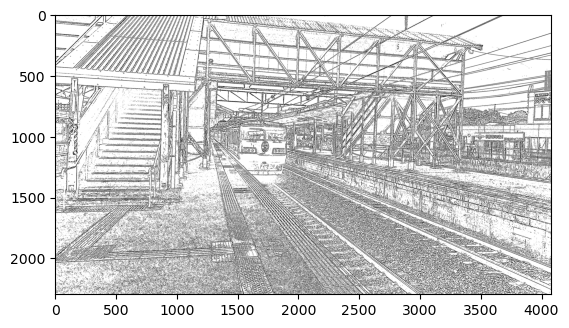

In [33]:
# 画像の確認
plt.imshow(cv2.cvtColor(thresholded, cv2.COLOR_BGR2RGB))
plt.show()

メディアンフィルタで塗りを作る

In [34]:
# 画像の読み込み
image = cv2.imread("C:\\Users\\morit\\Documents\\Python\\pouch\\pouch\\differential\\20241130_101421.jpg")
#image = cv2.imread("C:\\Users\\morit\\Documents\\Python\\pouch\\pouch\\differential\\20250111_122040.jpg")

In [35]:
#メディアンフィルタ
median = cv2.medianBlur(image, 15) 

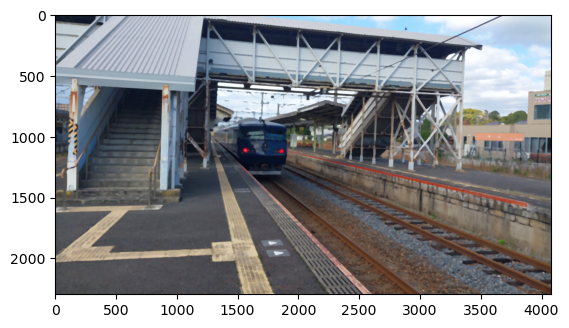

In [36]:
# 画像の確認
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.show()

結合する

In [ ]:
# 画像を結合
thresholded = cv2.cvtColor(thresholded, cv2.COLOR_GRAY2BGR)
blended = cv2.addWeighted(src1=thresholded, alpha=0.2, src2=median, beta=0.8, gamma=0)

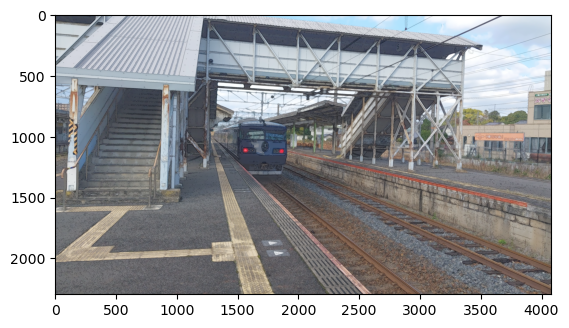

In [38]:
plt.imshow(cv2.cvtColor(blended, cv2.COLOR_BGR2RGB))
plt.show()

In [39]:
#画像の出力
cv2.imwrite("C:\\Users\\morit\\Documents\\Python\\pouch\\pouch\\differential\\output.jpg", blended)

True

参考文献
- https://www.youtube.com/watch?v=GZMJuuOKPrc
- https://www.codevace.com/py-opencv-laplacian/
- https://www.codevace.com/py-opencv-threshold/
- https://pystyle.info/opencv-median-filter/
- https://www.kikagaku.co.jp/kikagaku-blog/python-opencv/
- https://udemy.benesse.co.jp/development/python-work/opencv.html